In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### more than one independdent feature - multi linear


In [18]:
df_index = pd.read_csv("./economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [19]:
# drop uncessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)  # axis =1 indicated the column and inplace will update the df_index dataframe directly instead of storing in in another variable

In [20]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [23]:
#to check null values
df_index.isnull().sum()  #here sum() shows the total null values in individual columns

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

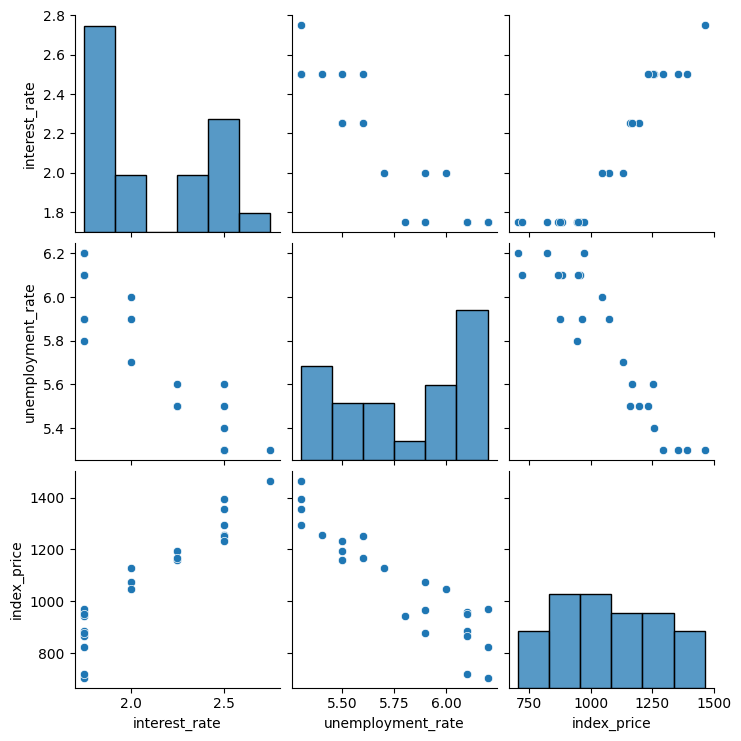

In [24]:
## Lets do some visualization
sns.pairplot(df_index)

In [25]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


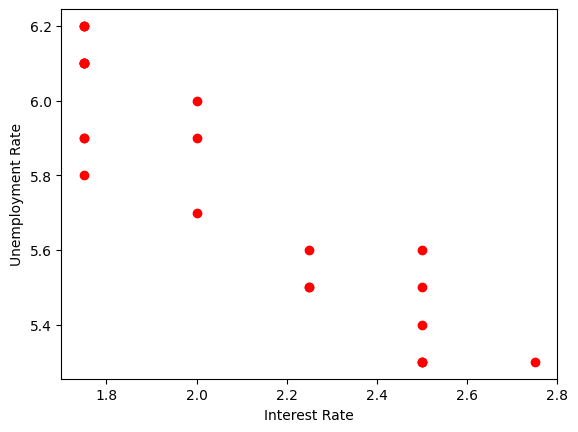

In [28]:
# Visulalize data points more closely
plt.scatter(df_index['interest_rate'],df['unemployment_rate'],color='red')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")
plt.show()

In [32]:
### independent and dependent featues
#X=df_index[['interest_rate','unemployment_rate']] # we can also use iloc df_index.iloc[:,:-1]
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [36]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [68]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [69]:
type(X),type(y) # as y contains only single column it shows as series and also the depended variable need to be in series

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [42]:
###train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

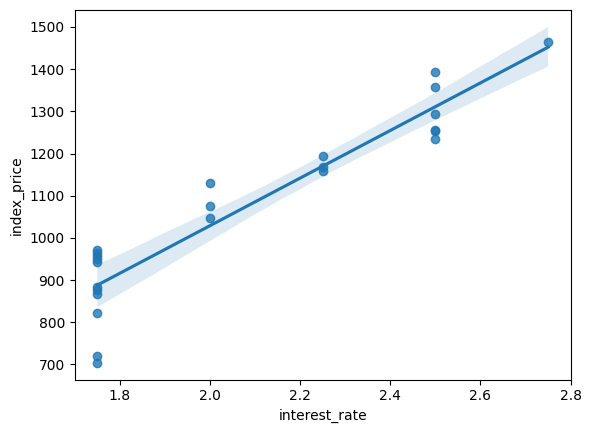

In [48]:
sns.regplot( data =df_index, x='interest_rate',y='index_price') # regplot creates a scatter plot with a linear regression line fit to the data. It's particularly useful for visualizing the relationship between two continuous variables and determining whether there is a linear relationship between them.

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

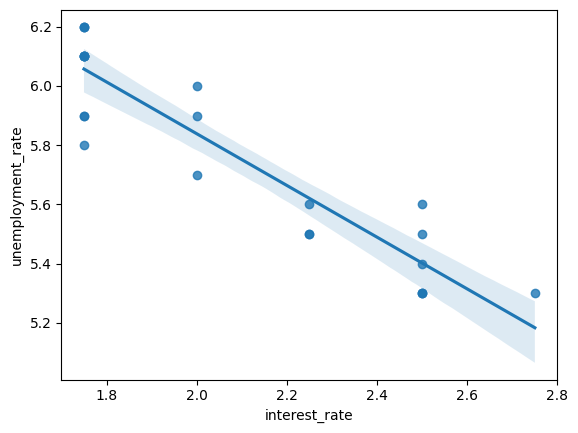

In [47]:
sns.regplot( data =df_index, x='interest_rate',y='unemployment_rate')

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

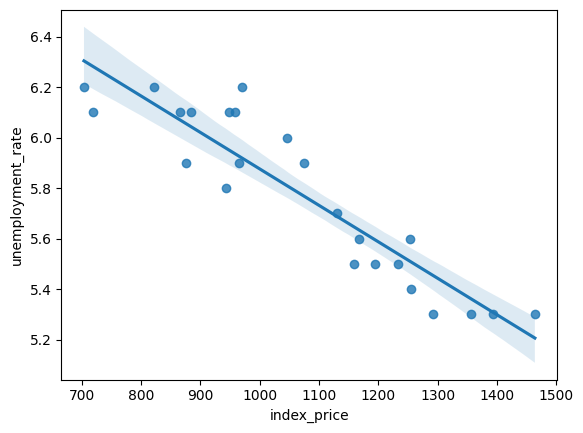

In [49]:
sns.regplot( data =df_index, x='index_price',y='unemployment_rate')

In [54]:
### standard scaling
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [77]:
X_train # converted from data frame to 2D array

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [78]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [79]:
regression.fit(X_train,y_train)

LinearRegression()

In [101]:
print("Coeffience or slope: ",regression.coef_ )# only single independent value so y hat = beta 0 +beta 1(x1) , beta 1  is the coeff or slope , beta 0 is the intercept
print("Intercept: ",regression.intercept_)

Coeffience or slope:  [  88.27275507 -116.25716066]
Intercept:  1053.4444444444443


In [80]:
#$Cross Validation
from sklearn.model_selection import cross_val_score  # Cross-validation is a technique to assess how well a model generalizes to an independent dataset. It helps in preventing overfitting and gives a better estimate of the model’s performance.
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                  cv=3)
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [81]:
np.mean(validation_score)

-5914.828180162386

In [82]:
# prediction
y_pred=regression.predict(X_test)
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [83]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [84]:
### performance metric
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [85]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.7591371539010257


In [86]:
## adjusted r square = 1-[(1-R2)*(n-1)/(n-k-1)]
n = len(y_test)
k = X_test.shape[1]

adjusted_r2 = 1 - ((1 - score) * (n - 1) / (n - k - 1))
print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.5985619231683761


In [87]:
## Assumptions

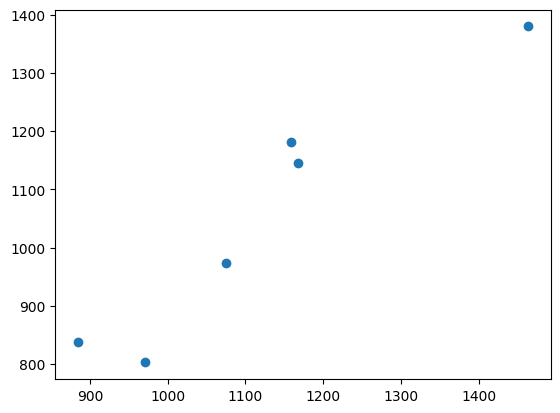

In [89]:
plt.scatter(y_test,y_pred) # if there is a linear relationship our model is performed well

In [90]:
residuals = y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_3144\531793104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals) # if you got normal distribution curve the model is good


<Axes: xlabel='index_price', ylabel='Density'>

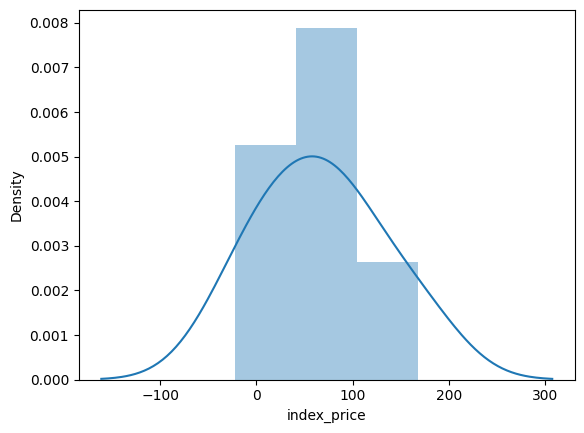

In [95]:
sns.distplot(residuals) # if you got normal distribution curve the model is good

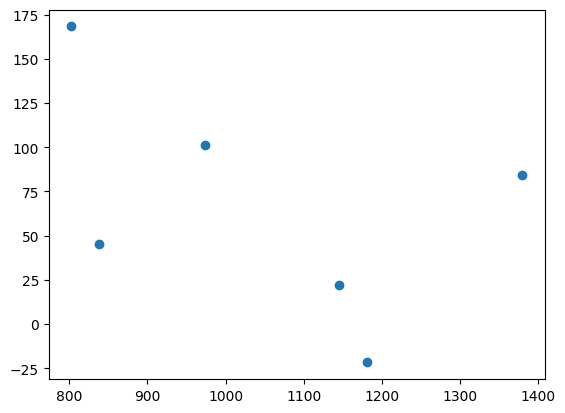

In [96]:
### create scatter plot wrt predictions and residuals
plt.scatter(y_pred,residuals) # data is uniformly distributed then it is fine

In [97]:
### OLS Linear Regression
import statsmodels.api as sm

In [98]:
model = sm.OLS(y_train,X_train).fit()

In [99]:
prediction =model.predict(X_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [100]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 29 Jun 2024   Prob (F-statistic):                       0.754
Time:                        11:46:22   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\hp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [118]:
print(X_test)
regression.predict(X_test)

[[ 0.36115756 -0.82078268]
 [-1.08347268  1.33377186]
 [ 1.8057878  -1.43636969]
 [-1.08347268  1.02597835]
 [-0.36115756  0.41039134]
 [ 0.36115756 -0.51298918]]


array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])